In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json 

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to  our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


628

## Perform API Calls

In [3]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 


# Create Empty list to hold desired data for cities

city_data = []


# Variable to keep track of cities with missing data or keys
MissingDataCount = 0  

# Print statements for signaling the beginning of the API data retrieval 

print(f"Beginning of Data Retrieval \n")
print(f"------------------------------------\n")


# Loop through each city to create a query url and get a response

for i, city in enumerate(cities): 
        query_url = url + "&q=" + city
        response = requests.get(query_url).json()
       
        try:
            print(f"Processing Record {i} | {city} \n")
            print(query_url)
            
            # append the responses to city_data list for each relevant key in the dictionary of responses
            
            city_data.append({"City": response["name"], 
                    "Temp" : response["main"]["temp"], 
                    "Cloudiness":response["clouds"]["all"], 
                    "Country": response["sys"]["country"],
                    "Date": response["dt"],
                    "Humidity": response["main"]["humidity"],
                    "Lat": response["coord"]["lat"],
                    "Lng": response["coord"]["lon"],
                    "Max Temp": response["main"]["temp_max"],
                    "Wind Speed": response["wind"]["speed"]
                   })
        except KeyError: # Where there is key error, keep track of the cities that have missing data
            MissingDataCount = MissingDataCount + 1
            
# Print the number of cities with missing data        
print("Incomplete Data for ", int(MissingDataCount), " cities.") 


# Create data frame from the relevant information and display head
City_Data = pd.DataFrame(city_data)
City_Data.head()



    

    



Beginning of Data Retrieval 

------------------------------------

Processing Record 0 | hobart 

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=57adc95d9d1ff6ce4756edfc530b960a&q=hobart
Processing Record 1 | mys shmidta 

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=57adc95d9d1ff6ce4756edfc530b960a&q=mys shmidta
Processing Record 2 | taolanaro 

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=57adc95d9d1ff6ce4756edfc530b960a&q=taolanaro
Processing Record 3 | yellowknife 

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=57adc95d9d1ff6ce4756edfc530b960a&q=yellowknife
Processing Record 4 | ushuaia 

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=57adc95d9d1ff6ce4756edfc530b960a&q=ushuaia
Processing Record 5 | umzimvubu 

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=57adc95d9d1ff6ce4756edfc530b960a&q=umzimvubu
Processing Record 6 | fortuna 

http://api.openweath

Processing Record 55 | ostrovnoy 

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=57adc95d9d1ff6ce4756edfc530b960a&q=ostrovnoy
Processing Record 56 | puerto ayora 

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=57adc95d9d1ff6ce4756edfc530b960a&q=puerto ayora
Processing Record 57 | tarudant 

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=57adc95d9d1ff6ce4756edfc530b960a&q=tarudant
Processing Record 58 | belyy yar 

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=57adc95d9d1ff6ce4756edfc530b960a&q=belyy yar
Processing Record 59 | hasaki 

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=57adc95d9d1ff6ce4756edfc530b960a&q=hasaki
Processing Record 60 | port blair 

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=57adc95d9d1ff6ce4756edfc530b960a&q=port blair
Processing Record 61 | new norfolk 

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=57adc95

Processing Record 111 | phan rang 

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=57adc95d9d1ff6ce4756edfc530b960a&q=phan rang
Processing Record 112 | saint anthony 

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=57adc95d9d1ff6ce4756edfc530b960a&q=saint anthony
Processing Record 113 | glace bay 

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=57adc95d9d1ff6ce4756edfc530b960a&q=glace bay
Processing Record 114 | vaini 

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=57adc95d9d1ff6ce4756edfc530b960a&q=vaini
Processing Record 115 | sao joao da barra 

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=57adc95d9d1ff6ce4756edfc530b960a&q=sao joao da barra
Processing Record 116 | dingle 

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=57adc95d9d1ff6ce4756edfc530b960a&q=dingle
Processing Record 117 | narsaq 

http://api.openweathermap.org/data/2.5/weather?units=Imperial&A

Processing Record 167 | santarem 

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=57adc95d9d1ff6ce4756edfc530b960a&q=santarem
Processing Record 168 | biltine 

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=57adc95d9d1ff6ce4756edfc530b960a&q=biltine
Processing Record 169 | kandrian 

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=57adc95d9d1ff6ce4756edfc530b960a&q=kandrian
Processing Record 170 | calama 

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=57adc95d9d1ff6ce4756edfc530b960a&q=calama
Processing Record 171 | roebourne 

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=57adc95d9d1ff6ce4756edfc530b960a&q=roebourne
Processing Record 172 | cap-aux-meules 

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=57adc95d9d1ff6ce4756edfc530b960a&q=cap-aux-meules
Processing Record 173 | torbay 

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=57adc95d9

Processing Record 223 | clermont 

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=57adc95d9d1ff6ce4756edfc530b960a&q=clermont
Processing Record 224 | emerald 

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=57adc95d9d1ff6ce4756edfc530b960a&q=emerald
Processing Record 225 | mar del plata 

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=57adc95d9d1ff6ce4756edfc530b960a&q=mar del plata
Processing Record 226 | nabha 

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=57adc95d9d1ff6ce4756edfc530b960a&q=nabha
Processing Record 227 | aklavik 

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=57adc95d9d1ff6ce4756edfc530b960a&q=aklavik
Processing Record 228 | kloulklubed 

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=57adc95d9d1ff6ce4756edfc530b960a&q=kloulklubed
Processing Record 229 | noumea 

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=57adc95d9d1

Processing Record 279 | haibowan 

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=57adc95d9d1ff6ce4756edfc530b960a&q=haibowan
Processing Record 280 | mount gambier 

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=57adc95d9d1ff6ce4756edfc530b960a&q=mount gambier
Processing Record 281 | arvika 

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=57adc95d9d1ff6ce4756edfc530b960a&q=arvika
Processing Record 282 | nome 

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=57adc95d9d1ff6ce4756edfc530b960a&q=nome
Processing Record 283 | puerto lempira 

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=57adc95d9d1ff6ce4756edfc530b960a&q=puerto lempira
Processing Record 284 | pitimbu 

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=57adc95d9d1ff6ce4756edfc530b960a&q=pitimbu
Processing Record 285 | nara 

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=57adc95d9d1

Processing Record 335 | samusu 

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=57adc95d9d1ff6ce4756edfc530b960a&q=samusu
Processing Record 336 | brza palanka 

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=57adc95d9d1ff6ce4756edfc530b960a&q=brza palanka
Processing Record 337 | hofn 

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=57adc95d9d1ff6ce4756edfc530b960a&q=hofn
Processing Record 338 | alyangula 

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=57adc95d9d1ff6ce4756edfc530b960a&q=alyangula
Processing Record 339 | san luis 

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=57adc95d9d1ff6ce4756edfc530b960a&q=san luis
Processing Record 340 | abonnema 

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=57adc95d9d1ff6ce4756edfc530b960a&q=abonnema
Processing Record 341 | warqla 

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=57adc95d9d1ff6ce475

Processing Record 391 | flinders 

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=57adc95d9d1ff6ce4756edfc530b960a&q=flinders
Processing Record 392 | montesilvano 

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=57adc95d9d1ff6ce4756edfc530b960a&q=montesilvano
Processing Record 393 | mocuba 

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=57adc95d9d1ff6ce4756edfc530b960a&q=mocuba
Processing Record 394 | natal 

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=57adc95d9d1ff6ce4756edfc530b960a&q=natal
Processing Record 395 | muisne 

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=57adc95d9d1ff6ce4756edfc530b960a&q=muisne
Processing Record 396 | verkhnevilyuysk 

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=57adc95d9d1ff6ce4756edfc530b960a&q=verkhnevilyuysk
Processing Record 397 | kununurra 

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=57adc9

Processing Record 447 | bahia blanca 

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=57adc95d9d1ff6ce4756edfc530b960a&q=bahia blanca
Processing Record 448 | cabedelo 

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=57adc95d9d1ff6ce4756edfc530b960a&q=cabedelo
Processing Record 449 | sambava 

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=57adc95d9d1ff6ce4756edfc530b960a&q=sambava
Processing Record 450 | taraza 

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=57adc95d9d1ff6ce4756edfc530b960a&q=taraza
Processing Record 451 | northampton 

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=57adc95d9d1ff6ce4756edfc530b960a&q=northampton
Processing Record 452 | lekoni 

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=57adc95d9d1ff6ce4756edfc530b960a&q=lekoni
Processing Record 453 | erzin 

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=57adc95d9d1ff6

Processing Record 503 | aljezur 

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=57adc95d9d1ff6ce4756edfc530b960a&q=aljezur
Processing Record 504 | wanxian 

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=57adc95d9d1ff6ce4756edfc530b960a&q=wanxian
Processing Record 505 | anaconda 

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=57adc95d9d1ff6ce4756edfc530b960a&q=anaconda
Processing Record 506 | grand gaube 

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=57adc95d9d1ff6ce4756edfc530b960a&q=grand gaube
Processing Record 507 | benghazi 

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=57adc95d9d1ff6ce4756edfc530b960a&q=benghazi
Processing Record 508 | prince rupert 

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=57adc95d9d1ff6ce4756edfc530b960a&q=prince rupert
Processing Record 509 | tevriz 

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=57adc

Processing Record 560 | rabat 

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=57adc95d9d1ff6ce4756edfc530b960a&q=rabat
Processing Record 561 | las vegas 

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=57adc95d9d1ff6ce4756edfc530b960a&q=las vegas
Processing Record 562 | sola 

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=57adc95d9d1ff6ce4756edfc530b960a&q=sola
Processing Record 563 | amapa 

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=57adc95d9d1ff6ce4756edfc530b960a&q=amapa
Processing Record 564 | fuzhou 

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=57adc95d9d1ff6ce4756edfc530b960a&q=fuzhou
Processing Record 565 | puerto narino 

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=57adc95d9d1ff6ce4756edfc530b960a&q=puerto narino
Processing Record 566 | barabinsk 

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=57adc95d9d1ff6ce4756edfc53

Processing Record 616 | mopti 

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=57adc95d9d1ff6ce4756edfc530b960a&q=mopti
Processing Record 617 | mission bend 

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=57adc95d9d1ff6ce4756edfc530b960a&q=mission bend
Processing Record 618 | nim ka thana 

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=57adc95d9d1ff6ce4756edfc530b960a&q=nim ka thana
Processing Record 619 | siparia 

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=57adc95d9d1ff6ce4756edfc530b960a&q=siparia
Processing Record 620 | alakurtti 

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=57adc95d9d1ff6ce4756edfc530b960a&q=alakurtti
Processing Record 621 | olawa 

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=57adc95d9d1ff6ce4756edfc530b960a&q=olawa
Processing Record 622 | reinosa 

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=57adc95d9d1f

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Temp,Wind Speed
0,Hobart,75,AU,1535236200,61,-42.88,147.33,48.2,48.2,13.87
1,Yellowknife,75,CA,1535234400,71,62.45,-114.38,51.8,51.8,11.41
2,Ushuaia,75,AR,1535234400,100,-54.81,-68.31,41.0,41.0,19.46
3,Fortuna,0,ES,1535236200,69,38.18,-1.13,80.6,80.6,9.17
4,Gizo,40,IL,1535235600,74,31.80,34.94,78.8,78.8,4.70


In [4]:
# Create a csv output file

City_Data.to_csv(output_data_file)

In [5]:

# Print the length of the cities in the city_data list to make sure we have at least 500 cities with complete data
print(len(city_data))

573


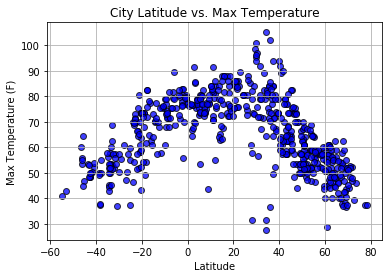

In [6]:
# Temperature vs Latitude Plot
MaxTemperature = City_Data["Max Temp"]
Latitude = City_Data["Lat"]

# Create Scatter Plot
Chart1 = plt.scatter(x=Latitude, y=MaxTemperature, marker="o", c= "blue", edgecolor="black", alpha=0.75)

plt.grid()
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# Save figure
plt.savefig("./Images/TempVSLatitude.png")



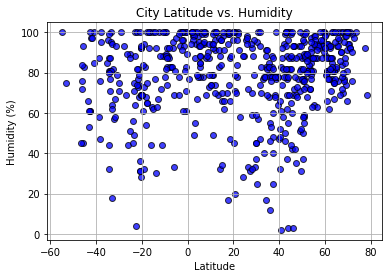

In [7]:
# Latitude vs Humidity Plot
Humidity = City_Data["Humidity"]

Chart2 = plt.scatter(x=Latitude, y=Humidity, marker="o", c= "blue", edgecolor="black", alpha=0.75)

# Create Scatter Plot
plt.grid()
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save figure
plt.savefig("./Images/HumidityVSLatitude.png")

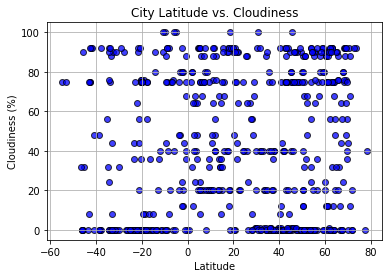

In [8]:
#Latitude vs Cloudiness
Cloudiness = City_Data["Cloudiness"]

# Create Scatter Plot

Chart3 = plt.scatter(x=Latitude, y=Cloudiness, marker="o", c= "blue", edgecolor="black", alpha=0.75)

plt.grid()
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save figure
plt.savefig("./Images/CloudinessVSLatitude.png")

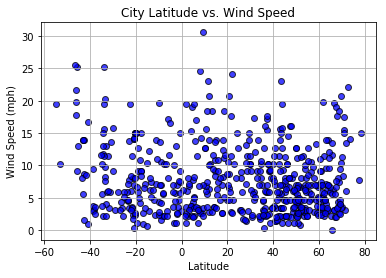

In [9]:
# Latitude vs Wind Speed
WindSpeed = City_Data["Wind Speed"]

# Create Scatter Plot
Chart4 = plt.scatter(x=Latitude, y=WindSpeed, marker="o", c= "blue", edgecolor="black", alpha=0.75)

plt.grid()
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Save figure
plt.savefig("./Images/WindSpeedVsLatitude.png")
